In [ ]:
# CS 451
# Coding Practice Session 2
# Last name: Graf
# Email: ndgraf@crimson.ua.edu

%pip install seaborn
import numpy as np
import pandas as pd

student_data = pd.read_csv('student_data.csv')
sales = pd.read_csv('sales.csv')
employee_data = pd.read_csv('employee_data.csv')

student_data.fillna(value=student_data['age'].mean(), inplace=True)

student_data.drop_duplicates(inplace=True, subset=['name', 'age', 'grade', 'address'])
student_data.reset_index(drop=True, inplace=True)

sales['price'] = sales['price'].str[:-3].astype(float)

employee_data.rename(columns={'age': 'employee_age', 'name': 'employee_name', 'salary': 'employee_salary'}, inplace=True)

employee_data['status'] = employee_data['status'].replace({'Active': 1, 'Inactive': 0})

student_data.drop(columns=['address'], inplace=True)

print(student_data)
print(sales)
print(employee_data)


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: C:\Users\natha\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


   id             name        age grade
0   1         John Doe  20.000000     A
1   2       Jane Smith  22.000000     B
2   3      Emily Davis  22.142857     A
3   4  Michael Johnson  23.000000     C
4   5    Jessica Brown  23.000000     B
5   8      Emma Wilson  24.000000     B
6   9         John Doe  22.142857     A
   product_id product_name  price  quantity
0         101        Apple    1.5       100
1         102       Banana    0.8       150
2         103       Orange    1.2       200
3         104   Strawberry    2.5        50
4         105       Grapes    3.0        75
5         106   Watermelon  500.0        30
6         107         Pear    2.0       180
7         108    Pineapple    2.8        90
   employee_id  employee_name  employee_age  employee_salary department  \
0            1     John Smith            29          40000.0  Marketing   
1            2       Jane Doe            35          50000.0      Sales   
2            3  Alice Johnson            30          60000.

AxesSubplot(0.125,0.11;0.62x0.77)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


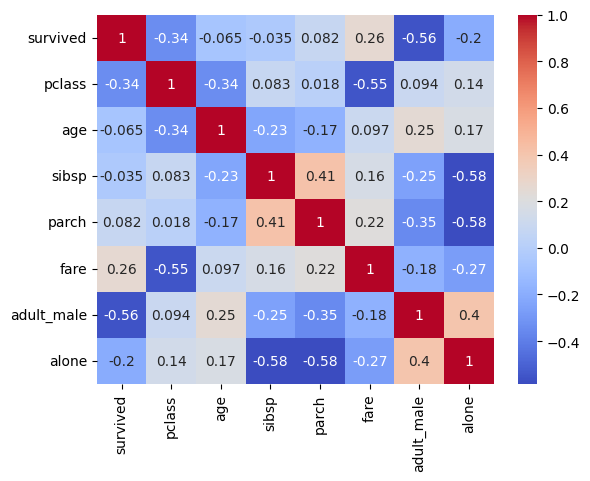

In [ ]:
import seaborn as sns
titanic_df = sns.load_dataset('titanic')\
    
titanic_df['age'].fillna(value=titanic_df['age'].median(), inplace=True)
titanic_df['embarked'].fillna(value=titanic_df['embarked'].mode()[0], inplace=True)

corr_matrix = titanic_df.corr(numeric_only = True)

heatmap = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
print(heatmap)
titanic_df



In [11]:
employee_data['normalized_salary'] = (employee_data['employee_salary'] - employee_data['employee_salary'].min()) / (employee_data['employee_salary'].max() - employee_data['employee_salary'].min())

# Remove outliers:
outliers = abs(employee_data['employee_salary'] - employee_data['employee_salary'].mean()) > 3 * employee_data['employee_salary'].std()

employee_data = employee_data[~outliers].reset_index(drop=True)

employee_data

,employee_id,employee_name,employee_age,employee_salary,department,status,normalized_salary
0,1,John Smith,29,40000.0,Marketing,1,0.000000
1,2,Jane Doe,35,50000.0,Sales,1,0.090909
2,3,Alice Johnson,30,60000.0,IT,0,0.181818
3,4,Michael Brown,25,NaN,HR,0,NaN
4,5,Sarah White,28,42000.0,Marketing,1,0.018182
5,6,John Smith,29,40000.0,Marketing,1,0.000000
6,7,David Green,40,150000.0,Sales,1,1.000000
7,8,Alice Johnson,30,60000.0,IT,0,0.181818
8,9,Michael Brown,25,NaN,HR,0,NaN


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: C:\Users\natha\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


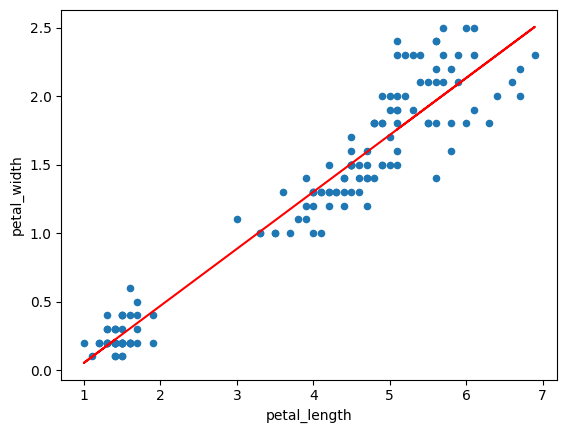

In [20]:
%pip install statsmodels
from sklearn.datasets import load_iris
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df.rename(columns={"petal length (cm)": "petal_length", "petal width (cm)": "petal_width"}, inplace=True)

m = smf.ols("petal_width ~ petal_length", data=df).fit()
m.summary()

df.plot(kind='scatter', x='petal_length', y='petal_width')
plt.plot(df['petal_length'], m.fittedvalues, color='red')
plt.show()
